# 1.运算符
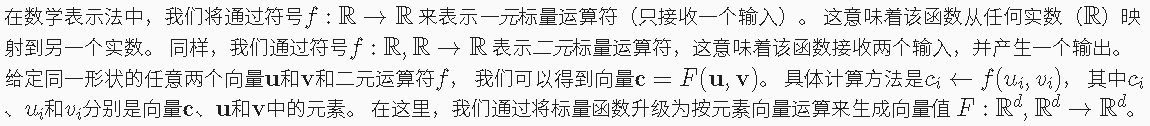

In [2]:
import torch

In [4]:
x=torch.tensor([2,3,4,5])
y=torch.tensor([1,2,3,4])
print(x+y)
print(x*y)
print(x/y)
print(x**y)

tensor([3, 5, 7, 9])
tensor([ 2,  6, 12, 20])
tensor([2.0000, 1.5000, 1.3333, 1.2500])
tensor([  2,   9,  64, 625])


In [5]:
# “按元素”方式可以应用更多的计算，包括像求幂这样的一元运算符。
z=torch.exp(x)
print(z)

tensor([  7.3891,  20.0855,  54.5981, 148.4132])


----

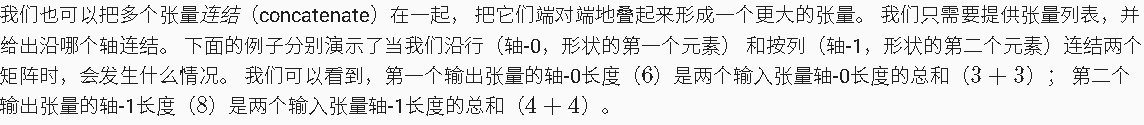

In [8]:
X=torch.arange(12,dtype=torch.float32).reshape((3,4))
Y=torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,-1]])
# 沿着0轴拼接
print(torch.cat((X,Y),dim=0))
# 沿着1轴拼接
print(torch.cat((X,Y),dim=1))

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2., -1.]])
tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2., -1.]])


---

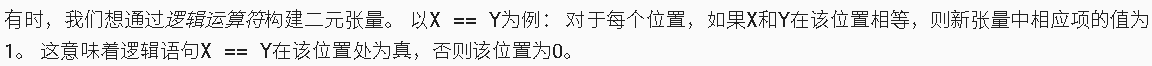

In [10]:
print(X==Y)

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])


In [12]:
# 对张量所有元素求和
print(X.sum())

tensor(66.)


## 2. 广播机制
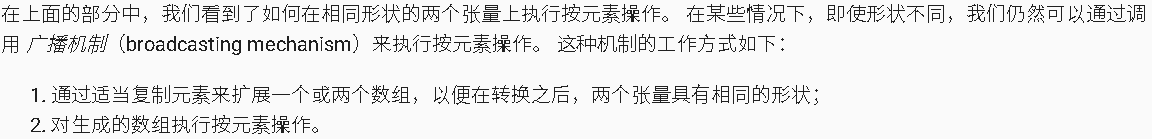

In [3]:
a=torch.arange(3).reshape((3,1))
b=torch.arange(2).reshape((1,2))
print(a)
print(b)

tensor([[0],
        [1],
        [2]])
tensor([[0, 1]])


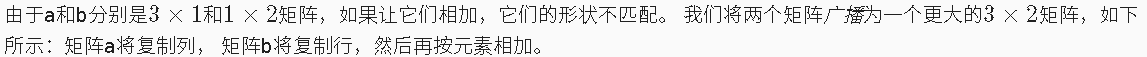

In [5]:
print(a+b)

tensor([[0, 1],
        [1, 2],
        [2, 3]])


# 3.索引和切片
就像在任何其他Python数组中一样，张量中的元素可以通过索引访问。 与任何Python数组一样：第一个元素的索引是0，最后一个元素索引是-1； 可以指定范围以包含第一个元素和最后一个之前的元素。

In [12]:
t4=torch.tensor([1,2,3,4,5,6]).reshape(-1,2)
print(t4)
print(t4[-1])
print(t4[0:2])

tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([5, 6])
tensor([[1, 2],
        [3, 4]])


In [16]:
# 指定索引写入矩阵
t4[1, 1]=9
print(t4)

tensor([[1, 2],
        [3, 9],
        [5, 6]])


In [18]:
# 如果我们想为多个元素赋值相同的值，我们只需要索引所有元素，然后为它们赋值。 例如，[0:2, :]访问第1行和第2行，
# 其中“:”代表沿轴1（列）的所有元素。 虽然我们讨论的是矩阵的索引，但这也适用于向量和超过2个维度的张量。

# 所有行的的第一列赋值为12
t4[:,1]=12
print(t4)

tensor([[ 1, 12],
        [ 3, 12],
        [ 5, 12]])


# 4.节省内存
运行一些操作可能会导致为新结果分配内存。 例如，如果我们用Y = X + Y，我们将取消引用Y指向的张量，而是指向新分配的内存处的张量。

在下面的例子中，我们用Python的id()函数演示了这一点， 它给我们提供了内存中引用对象的确切地址。 运行Y = Y + X后，我们会发现id(Y)指向另一个位置。 这是因为Python首先计算Y + X，为结果分配新的内存，然后使Y指向内存中的这个新位置。

In [19]:
before=id(t4)
t4=t4+t4
print(id(t4)==before)

False


这可能是不可取的，原因有两个：
首先，我们不想总是不必要地分配内存。在机器学习中，我们可能有数百兆的参数，并且在一秒内多次更新所有参数。通常情况下，我们希望原地执行这些更新；如果我们不原地更新，其他引用仍然会指向旧的内存位置，这样我们的某些代码可能会无意中引用旧的参数。

幸运的是，执行原地操作非常简单。 我们可以使用切片表示法将操作的结果分配给先前分配的数组，例如Y[:] = <expression>。 为了说明这一点，我们首先创建一个新的矩阵Z，其形状与另一个Y相同， 使用zeros_like来分配一个全0的块。

In [20]:
Z=torch.zeros_like(t4)
print('id(Z):',id(Z))
Z[:]=t4+t4
print('new id(Z):',id(Z))

id(Z): 2014529169104
new id(Z): 2014529169104


# 5.转换为其他Python对象
将深度学习框架定义的张量转换为NumPy张量（ndarray）很容易，反之也同样容易。 torch张量和numpy数组将共享它们的底层内存，就地操作更改一个张量也会同时更改另一个张量。

In [22]:
A1=t4.numpy()
B1=torch.tensor(A1)
print(type(A1))
print(type(B1))

<class 'numpy.ndarray'>
<class 'torch.Tensor'>


In [25]:
a=torch.tensor([3.6])
print(a)
print(a.item())
print(float(a))
print(int(a))

tensor([3.6000])
3.5999999046325684
3.5999999046325684
3


---

# 6.练习


### 1.运行本节中的代码。将本节中的条件语句X == Y更改为X < Y或X > Y，然后看看你可以得到什么样的张量。

In [28]:
test1=torch.tensor([1,2,3,4,5,6,7,8]).reshape(2,-1)
test2=torch.tensor([8,7,6,5,4,3,2,1]).reshape(2,-1)
print(test1==test2)
print(test1>test2)
print(test1<test2)

tensor([[False, False, False, False],
        [False, False, False, False]])
tensor([[False, False, False, False],
        [ True,  True,  True,  True]])
tensor([[ True,  True,  True,  True],
        [False, False, False, False]])


### 2.用其他形状（例如三维张量）替换广播机制中按元素操作的两个张量。结果是否与预期相同？

In [51]:
test3=torch.tensor([1,2,3,1,2,3]).reshape(2,3,1)
test4=torch.tensor([1,2,3,1,2,3,1,2]).reshape(2,1,4)
print(test3)
print(test4)

tensor([[[1],
         [2],
         [3]],

        [[1],
         [2],
         [3]]])
tensor([[[1, 2, 3, 1]],

        [[2, 3, 1, 2]]])


In [53]:
test5=test3+test4
print(test5)
print(test5.shape)

tensor([[[2, 3, 4, 2],
         [3, 4, 5, 3],
         [4, 5, 6, 4]],

        [[3, 4, 2, 3],
         [4, 5, 3, 4],
         [5, 6, 4, 5]]])
torch.Size([2, 3, 4])


注意广播机制要符合规则：
1.从尾部往前比对
2.如果维度相同，继续比较下一维度
3.如果某个维度为1，则这一维度可以扩展以匹配另一个张量对应维度
4.如果两个维度不同且不为1，则无法广播